<a href="https://colab.research.google.com/github/Rudi83/Jadi-1/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang diperlukan
import pandas as pd  # Untuk manipulasi data
import matplotlib.pyplot as plt  # Untuk visualisasi data
import numpy as np  # Untuk komputasi numerik
from sklearn.cluster import KMeans  # Algoritma clustering
from sklearn.preprocessing import StandardScaler  # Untuk standardisasi data
from mpl_toolkits.mplot3d import Axes3D  # Untuk visualisasi 3D

In [ ]:
# 1. Memuat Data
# Membaca file CSV 'Customers.csv' ke dalam DataFrame
df = pd.read_csv('Customers.csv')

# Menampilkan 5 baris pertama data untuk inspeksi awal
print("Data Awal:")
print(df.head())

Data Awal:
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


In [ ]:
# 2. Pembersihan Nama Kolom
# Membersihkan nama kolom dengan menghapus:
# - Spasi (\s+)
# - Underscore (_)
# - Simbol dollar ($)
# - Teks dalam tanda kurung beserta tanda kurungnya (\([^)]*\))
df.columns = df.columns.str.replace(r'\s+', '', regex=True)\
                       .str.replace(r'_', '', regex=True)\
                       .str.replace(r'\$', '', regex=True)\
                       .str.replace(r'\([^)]*\)', '', regex=True)

print("\nData setelah Pembersihan Kolom:")
print(df.head())


Data setelah Pembersihan Kolom:
   CustomerID  Gender  Age  AnnualIncome  SpendingScore     Profession  \
0           1    Male   19         15000             39     Healthcare   
1           2    Male   21         35000             81       Engineer   
2           3  Female   20         86000              6       Engineer   
3           4  Female   23         59000             77         Lawyer   
4           5  Female   31         38000             40  Entertainment   

   WorkExperience  FamilySize  
0               1           4  
1               3           3  
2               1           1  
3               0           2  
4               2           6  


In [ ]:
# 3. Pemilihan Fitur
# Memilih kolom numerik yang relevan untuk clustering
fitur = ['Age', 'AnnualIncome', 'SpendingScore']
X = df[fitur]

print("\nFitur yang Dipilih:")
print(X.head())


Fitur yang Dipilih:
   Age  AnnualIncome  SpendingScore
0   19         15000             39
1   21         35000             81
2   20         86000              6
3   23         59000             77
4   31         38000             40


In [ ]:
# 4. Preprocessing Data
# Standardisasi data (scaling) agar semua fitur memiliki mean=0 dan std=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nData setelah Standardisasi:")
print(X_scaled[:5])  # Menampilkan 5 baris pertama data yang sudah di-scale

# 5. Clustering dengan K-Means
# Membuat model K-Means dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

# Melakukan clustering pada data asli (tanpa scaling)
df['Cluster_Original'] = kmeans.fit_predict(X)

# Melakukan clustering pada data yang sudah di-scale
df['Cluster_Scaled'] = kmeans.fit_predict(X_scaled)

print("\nData dengan Hasil Clustering:")
print(df.head())


Data setelah Standardisasi:
[[-1.05408932 -2.09350095 -0.42833854]
 [-0.98372287 -1.65613312  1.07554599]
 [-1.0189061  -0.54084515 -1.6099621 ]
 [-0.91335643 -1.13129172  0.93231889]
 [-0.63189066 -1.59052794 -0.39253176]]

Data dengan Hasil Clustering:
   CustomerID  Gender  Age  AnnualIncome  SpendingScore     Profession  \
0           1    Male   19         15000             39     Healthcare   
1           2    Male   21         35000             81       Engineer   
2           3  Female   20         86000              6       Engineer   
3           4  Female   23         59000             77         Lawyer   
4           5  Female   31         38000             40  Entertainment   

   WorkExperience  FamilySize  Cluster_Original  Cluster_Scaled  
0               1           4                 2               2  
1               3           3                 2               2  
2               1           1                 1               2  
3               0           2      

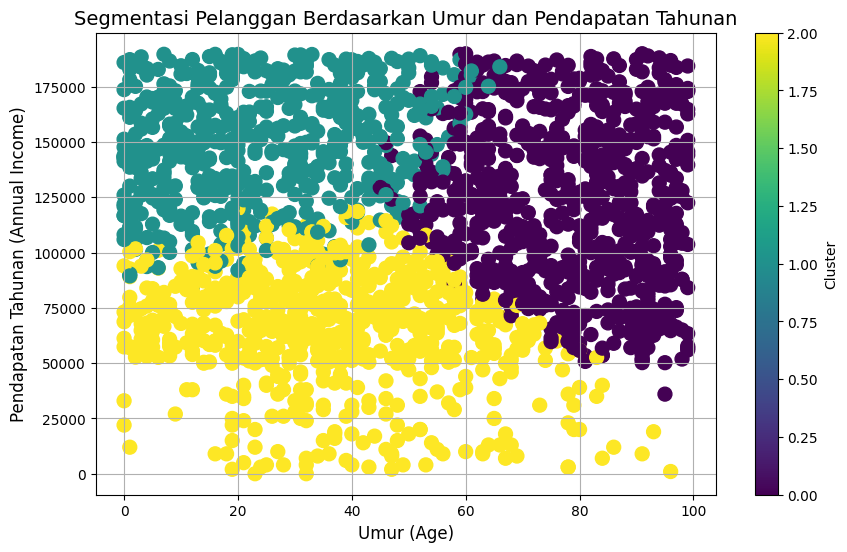

In [ ]:
# 6a. Visualisasi 2D (Umur vs Pendapatan Tahunan)
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['AnnualIncome'], c=df['Cluster_Scaled'], cmap='viridis', s=100)
plt.xlabel('Umur (Age)', fontsize=12)
plt.ylabel('Pendapatan Tahunan (Annual Income)', fontsize=12)
plt.title('Segmentasi Pelanggan Berdasarkan Umur dan Pendapatan Tahunan', fontsize=14)
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

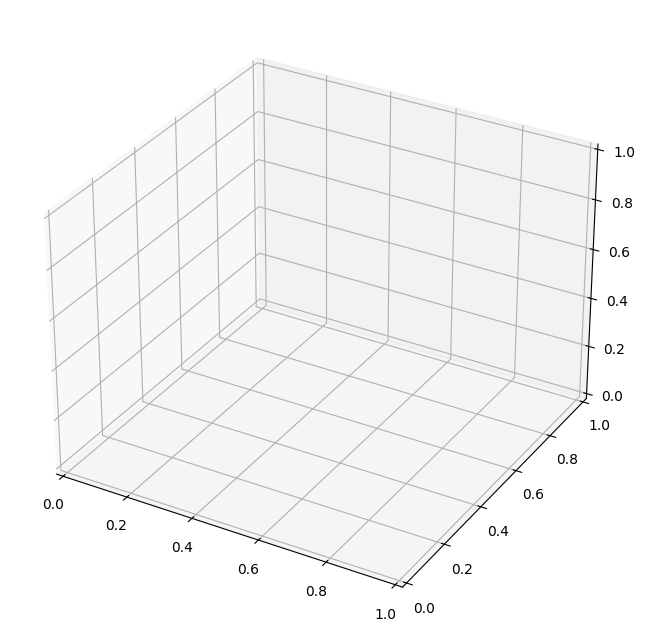

In [ ]:
# 6b. Visualisasi 3D (Umur, Pendapatan, Skor Belanja)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

In [ ]:
# Membuat scatter plot 3D
scatter = ax.scatter(df['Age'], df['AnnualIncome'], df['SpendingScore'],
                     c=df['Cluster_Scaled'], cmap='viridis', s=100, depthshade=True)

In [ ]:
# Menambahkan label dan judul
ax.set_xlabel('Umur (Age)', fontsize=12)
ax.set_ylabel('Pendapatan Tahunan (Annual Income)', fontsize=12)
ax.set_zlabel('Skor Belanja (Spending Score)', fontsize=12)
ax.set_title('Segmentasi 3D Pelanggan: Umur, Pendapatan, dan Skor Belanja', fontsize=14)

Text(0.5, 0.92, 'Segmentasi 3D Pelanggan: Umur, Pendapatan, dan Skor Belanja')

In [ ]:
# Menambahkan legenda cluster
legend = ax.legend(*scatter.legend_elements(), title="Cluster", loc='upper right')
ax.add_artist(legend)

In [ ]:
# Menambahkan grid untuk memudahkan interpretasi
ax.grid(True)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>